First import some of the package we will use in this exercise

In [14]:
#http://www.mbaexcel.com/excel/how-to-use-the-vlookup-hlookup-combination-formula/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
# First download the data. 
# I initially download the legend sheet of data so that I know the meaning of variable names
df_legend = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.xlsx',sheet_name='Legend')
# some columns are poorly named, like 'Unnamed: 1', I give them a proper name, like 'Definition'
df_legend.rename(columns={'Maddison Project Database (MPD) 2018':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
# Some rows have missing entries, I drop them
df_legend.dropna(inplace=True)
# Now I create a dictionary from the dataframe I downloaded
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [12]:
# Here is my dictionary
df_legend

{'Full data': 'Data in  single table',
 'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'year': 'Year',
 'cgdppc': 'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)',
 'rgdpnapc': 'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)',
 'pop': 'Population, mid-year (thousands)',
 'i_cig': '0/1/2: observation is extrapolated (0), benchmark (1), or interpolated (2)',
 'i_bm': 'For benchmark observations: 1: ICP PPP estimates, 2: Historical income benchmarks, 3: Real wages and urbanization, 4: Multiple of subsistence, 5: Braithwaite (1968) PPPs',
 'Partial countries': 'Data for selected sub-national units with long time series'}

In [13]:
df_legend['rgdpnapc']

'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)'

In [15]:
# Now download the actual data
df = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.xlsx',sheet_name='Full data')

In [17]:
# First 5 rows of our data looks like this
df.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN


In [7]:
country_list = ['GBR','USA','DEU','FRA','CHN','IND']
df2 = df[df.countrycode.isin(country_list)].copy()

In [8]:
df2.country.unique()

array(['China', 'Germany', 'France', 'United Kingdom', 'India',
       'United States'], dtype=object)

In [9]:
df2.sort_values(['countrycode','year'],inplace=True)

In [10]:
df_legend['rgdpnapc']

'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)'

In [14]:
years = [2000,2016]
year_diff = years[1]-years[0]

In [15]:
growth_rates = (df2[df2.year.isin(years)].groupby(['countrycode','country']).apply(lambda x:
                100*((x.iloc[1]['rgdpnapc']/x.iloc[0]['rgdpnapc'])**(1/year_diff)-1)).reset_index().
                rename(columns={0:'Avg. Growth (2000-2016)'}))

In [16]:
growth_rates['Years to double'] = 72/growth_rates['Avg. Growth (2000-2016)']

In [33]:
growth_rates.round(decimals={'Avg. Growth (2000-2016)':2,'Years to double':0})

,countrycode,country,Avg. Growth (2000-2016),Years to double
0,CHN,China,7.09,10.0
1,DEU,Germany,1.06,68.0
2,FRA,France,0.56,129.0
3,GBR,United Kingdom,1.04,69.0
4,IND,India,5.75,13.0
5,USA,United States,0.91,79.0


In [2]:
f = lambda x: .2*x**.5 + .9*x

In [3]:
x = [1]
T = 100
for t in range(T):
    x.append(f(x[t])) 

In [4]:
x[74]

3.9090288309248997

In [2]:
import qeds
qeds.themes.mpl_style();
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.remove('#fec630')
sns.set_style('whitegrid')

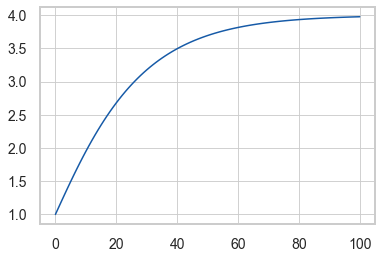

In [26]:
plt.plot(x)

In [3]:
from tabulate import tabulate

In [20]:
print(tabulate(growth_rates.round(decimals=1).reset_index(), tablefmt="pipe", 
               showindex=False,headers="keys"))

|   index | countrycode   | country        |   Avg. Growth (2000-2016) |   Years to double |
|--------:|:--------------|:---------------|--------------------------:|------------------:|
|       0 | CHN           | China          |                       7.1 |              10.2 |
|       1 | DEU           | Germany        |                       1.1 |              68.2 |
|       2 | FRA           | France         |                       0.6 |             129.3 |
|       3 | GBR           | United Kingdom |                       1   |              69   |
|       4 | IND           | India          |                       5.7 |              12.5 |
|       5 | USA           | United States  |                       0.9 |              79.4 |


In [39]:
np.round(x[74],decimals=2)

3.91